# Ejercicio 2

Mejoras a realizar:
- No utilizar datos de validación para reemplazar datos.
- k folds independientes. 
  - Calcular por ejemplo las medianas de train en cada k fold y reemplazar en base a lo obtenido.
- Agregar hiperparámetros.
  - Reemplazar nulos por la mediana vs no reemplazarlos.
  - Eliminar columnas individualmente.
  - Eliminar conjuntamente las columnas que individualmente hayan mejorado la métrica.
- Chequear que no haya overfitting.


## Exploratory Data Analysis (EDA)

### Importamos los datos

Realizamos la lectura del archivo y lo guardamos en un data frame.

In [202]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
df = pd.read_csv('diabetes.csv')

In [203]:
# Se importan librerías para graficar.
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Verificación del formato

Imprimimos ahora las primeras 5 filas del data frame para analizar su estructura básica.

In [204]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


El tamaño del data frame con el que trabajaremos es:

In [205]:
print(df.shape)

(768, 9)


Utilizamos el método .info() para ver los datatypes y si hay celdas con contenido nulo (vacías)

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Con la siguiente linea contamos los valores nulos para el data frame. De esta manera chequeamos efectivamente que no hay datos vacíos para ninguna característica.

In [207]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Podemos utilizar el método describe para examinar como son los valores que se presentan dentro del dataframe.  

In [208]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


En particular, se puede notar a partir de la tabla realizada que los valores mínimos en algunas columnas tienen valor cero. En algunos casos como por ejemplo en la presión sanguínea, dicho valor carece de sentido físico para una persona viva. Por lo tanto se concluyó que se trata de datos erróneos los cuales deberán ser tratados en la etapa de limpieza de datos. 

A continuación se estudian las cantidades de los casos que tienen y que no tienen diabetes. Posteriormente, se imprimen en un Pie Plot las proporciones con respecto al total de los casos.

In [209]:
healthy_people_num = (df['Outcome'] == 0).sum()
sick_people_num = (df['Outcome'] != 0).sum()
total = df.shape[0]
print("Healthy people: " + str(healthy_people_num))
print("Sick people: " + str(sick_people_num))
print("Total: " + str(total))

Healthy people: 500
Sick people: 268
Total: 768


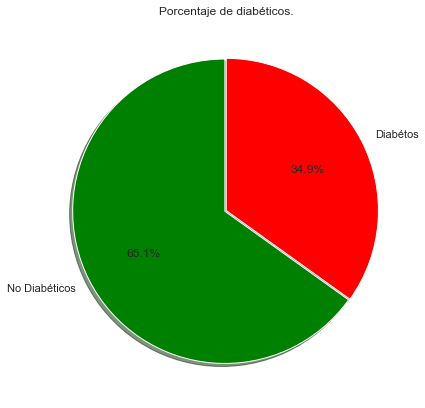

In [210]:
sns.set(style="whitegrid")
labels = ['No Diabéticos', 'Diabétos']
sizes = [healthy_people_num,sick_people_num]
colors = ["green","red"]
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, explode= (0.01,0) , colors=colors, autopct='%1.1f%%', shadow=True, startangle=90,)

plt.title('Porcentaje de diabéticos.')
plt.show()

A partir del gráfico anterior se distingue que el grupo de casos con diabetes versus los casos de no diabetes no se encuentra balanceado. Es decir, en nuestro dataframe hay mayor cantidad de personas sanas que con diabetes.

### Limpieza de los datos

Anteriormente, se consideró la gran cantidad de datos que tiene valor cero. Para tratar con estos datos, se los reemplaza en primera medida por valores nulos (NaN) y posteriormente serán modificados.

In [211]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

Ahora, se cuenta la cantidad de elementos nulos para cada columna. Estos son aquellos elementos que anteriormente valían cero, un valor que no era posible.

In [212]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Separación Train y Test

In [213]:
np.random.seed(0)
msk = np.random.rand(len(df)) < 0.8
train_val_df = df[msk]
test_data = df[~msk]

### Definición de funciones

In [214]:
import math

def calculate_gaussian_likelihood(x, mean_std):
	"""
	Devuelve el likelihood asociado a una variable dado una media y un desvío estándar.
	Recibe:
		1. x: valor de la variable.
		2. mean_std: tupla, lista o np array cuyo primer elemento corresponde a la media y su segundo elemento al desvío estándar.
	"""
	mean = mean_std[0]
	stdev = mean_std[1]
	exponent = math.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent

In [215]:
def calculate_mean_std(set_df, column, outcome):
    """
    Calcula la media y el desvío estándar de una columna de un dataframe para aquellas filas donde el outcome tome un valor determinado.
    Recibe: 
        1. set_df: Dataframe.
        2. column: Nombre de la columna cuyas media y stdev se buscan.
        3. outcome: Valor del outcome sobre el cual se filtra el data set.
    Devuelve:
        np array cuyo primer elemento es la media y el segundo elemento el desvío estándar.
    """
    filtered_df = set_df[[column, 'Outcome']].groupby(['Outcome'])[[column]]
    mean = filtered_df.mean().reset_index().iloc[outcome,1]
    std = filtered_df.std().reset_index().iloc[outcome,1]
    return np.array([mean, std])

In [216]:
def train_model(train_df):
    """
    Función que entrena al modelo dado un DataFrame de entrenamiento.
    Recibe:
        1. train_df: DF de entrenamiento.
    Devuelve:
        *   Matriz de 2 x {Cantidad de columnas del dataframe - 1}.
            Cada celda de la matriz contiene un np array cuyo primer elemento es la media y el segundo elemento el desvío estándar para cada columna y para cada posible outcome.
            La primera fila de la matriz corresponde al outcome 0 y la segunda fila al outcome 1.
            Cada columna de la matriz está asociada a cada columna del dataframe (excepto la columna de outcome).
        *   Priori_probs: Lista con las probabilidades a priori para outcome 0 y outcome 1.
    """
    healthy_p_train = (train_df['Outcome'] == 0).sum()
    sick_p_train = (train_df['Outcome'] != 0).sum()
    total = train_df.shape[0]
    priori_probs = [healthy_p_train / (healthy_p_train + sick_p_train), sick_p_train / (healthy_p_train + sick_p_train)]
    train_matrix =  np.empty([2, len(train_df.columns)-1], dtype = object)
    for ind, column in enumerate(train_df.columns):
        if (ind != train_df.columns.get_loc("Outcome")):
            train_matrix[0][ind] = calculate_mean_std(train_df, train_df.columns[ind], 0)
            train_matrix[1][ind] = calculate_mean_std(train_df, train_df.columns[ind], 1)
    return train_matrix, priori_probs

In [217]:
def pred(row, matrix, priori_probs):
    """
    Función que dada una fila correspondiente a una muestra de un individuo, una matriz entrenada (con los valores de las medias y desvíos estándar) y las probabilidad a priori de cada outcome, calcula si es más probable que el individuo posea diabetes o no.
    Recibe:
        1. Row: Fila con los valores de las características de un individuo. Cada elemento está asociado a una columna del dataframe de entrenamiento utilizado.
        2. Matrix: Matriz resultante de la función train_model.
        3. Priori_probs: Lista con las probabilidades a priori para outcome 0 y outcome 1.
    Devuelve:
        Valor (0 o 1) más probable para el outcome.
    """
    likelihoods_0 = np.array([])
    likelihoods_1 = np.array([])
    for ind, column in enumerate(row):
        likelihoods_0 = np.append(likelihoods_0, math.log(calculate_gaussian_likelihood(column, matrix[0][ind])))
        likelihoods_1 = np.append(likelihoods_1, math.log(calculate_gaussian_likelihood(column, matrix[1][ind])))
    prob_0 = likelihoods_0.sum()
    prob_1 = likelihoods_1.sum()
    prob_0 += math.log(priori_probs[0])
    prob_1 += math.log(priori_probs[1])
    if(prob_1 >= prob_0):
        return 1.0
    else:
        return 0.0

In [218]:
from sklearn import metrics
import numpy as np
from sklearn.model_selection import KFold
def k_folding(df, columnsToReplaceNulls = [], removeCols = []):
    """
    Función que dado un dataframe realiza un k-folding con k=5.
    Recibe:
        Dataframe
    Devuelve:
        Lista que contiene a las matrices de confusión para cada k_i paso.
    """
    dataframe = df.copy()
    kf = KFold(n_splits = 5)
    sub_sets = kf.split(dataframe)
    conf_matrix = []
    train_aucs = []
    val_aucs = []
    models = []
    replaceNullsCols = [n for n in columnsToReplaceNulls if n not in removeCols]
    dataframe = dataframe.drop(removeCols, axis=1)

    for train_index, val_index in sub_sets: 
        train_outcomes = []
        val_outcomes = []
        pred_train_outcomes = []
        pred_val_outcomes = []
        train_df = dataframe.iloc[train_index]
        val_df = dataframe.iloc[val_index]

        ##Reemplazo nulos
        medians = train_df[replaceNullsCols].median()
        train_df[replaceNullsCols] = train_df[replaceNullsCols].replace(np.NaN,medians)
        val_df[replaceNullsCols] = val_df[replaceNullsCols].replace(np.NaN,medians)

        matrix_train, priori_probs = train_model(train_df)
        model =[medians, matrix_train, priori_probs]
        models.append(model)
        ## Train
        for index, row in train_df.iterrows():
            true_outcome = row["Outcome"]
            pred_outcome = pred(row.to_list()[:-1], matrix_train, priori_probs)
            train_outcomes.append(true_outcome)
            pred_train_outcomes.append(pred_outcome)

        ## Validacion
        for index, row in val_df.iterrows():
            true_outcome = row["Outcome"]
            pred_outcome = pred(row.to_list()[:-1], matrix_train, priori_probs)
            val_outcomes.append(true_outcome)
            pred_val_outcomes.append(pred_outcome)

        fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train_outcomes, pred_train_outcomes)
        auc_train_i = metrics.auc(fpr_train, tpr_train)

        fpr_val, tpr_val, thresholds_val = metrics.roc_curve(val_outcomes, pred_val_outcomes)
        auc_val_i = metrics.auc(fpr_val, tpr_val)

        val_aucs.append(auc_val_i)
        train_aucs.append(auc_train_i)
        
        conf_matrix.append(metrics.confusion_matrix(val_outcomes, pred_val_outcomes))
    return conf_matrix, train_aucs, val_aucs, models


In [219]:
def plot_all_conf_matrix(conf_matrix):
    """
    Función que dada una lista de matrices de confusión, realiza el gráfico para cada una de ellas.
    """
    for matrix in conf_matrix:
        ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
        xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
        sns.set(font_scale = 1.5)
        plt.figure(figsize=(15,6))
        sns.heatmap(matrix, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)
        plt.yticks(rotation=0);

## Pruebas
### Sin reemplazar nulos

In [220]:
conf_matrix_nr, train_aucs_nr, val_aucs_nr, models_nr = k_folding(train_val_df)

In [221]:
print('AUC Train: ' + str(round(np.array(train_aucs_nr).mean(),3)))
print('AUC Validation: ' + str(round(np.array(val_aucs_nr).mean(),3)))

AUC Train: 0.623
AUC Validation: 0.63


### Reemplazando nulos

In [222]:
conf_matrix, train_aucs, val_aucs, models = k_folding(train_val_df,  ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])

In [223]:
print('AUC Train: ' + str(round(np.array(train_aucs).mean(),3)))
print('AUC Validation: ' + str(round(np.array(val_aucs).mean(),3)))

AUC Train: 0.727
AUC Validation: 0.73


### Eliminando columnas

In [224]:
bestAuc = np.array(val_aucs).mean()
# Columnas a analizar
tryRemovingCols = ['BloodPressure', 'Insulin', 'Age', 'DiabetesPedigreeFunction', 'Pregnancies', 'SkinThickness']
removeColsImproved = []
removeColsAuc = []
removeColsAucTrain = []

nullCols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
		
for col in tryRemovingCols:
	print(col)	
	conf_matrix_col, train_aucs_col, val_aucs_col, models_col = k_folding(train_val_df, columnsToReplaceNulls=nullCols, removeCols=[col])
	# Si la métrica mejora se guarda la columna a remover.
	if (np.array(val_aucs_col).mean() > bestAuc):
		removeColsImproved.append(col)
		removeColsAucTrain.append(np.array(train_aucs_col).mean())
		removeColsAuc.append(np.array(val_aucs_col).mean())

BloodPressure
Insulin
Age
DiabetesPedigreeFunction
Pregnancies
SkinThickness


In [225]:
# Se imprimen las columnas que al removerlas aumentaron la métrica.
print(removeColsImproved)
print("Train AUCs:")
print(np.array(removeColsAucTrain).round(3))
print('Val AUCs:')
print(np.array(removeColsAuc).round(3))

['BloodPressure', 'SkinThickness']
Train AUCs:
[0.728 0.732]
Val AUCs:
[0.731 0.731]


### Eliminando todas las columnas anteriores

In [226]:
conf_matrix_rac, train_aucs_rac, val_aucs_rac, models_rac = k_folding(train_val_df,  ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'], removeCols=removeColsImproved)

In [227]:
print('AUC Train: ' + str(round(np.array(train_aucs_rac).mean(),3)))
print('AUC Validation: ' + str(round(np.array(val_aucs_rac).mean(),3)))

AUC Train: 0.73
AUC Validation: 0.736


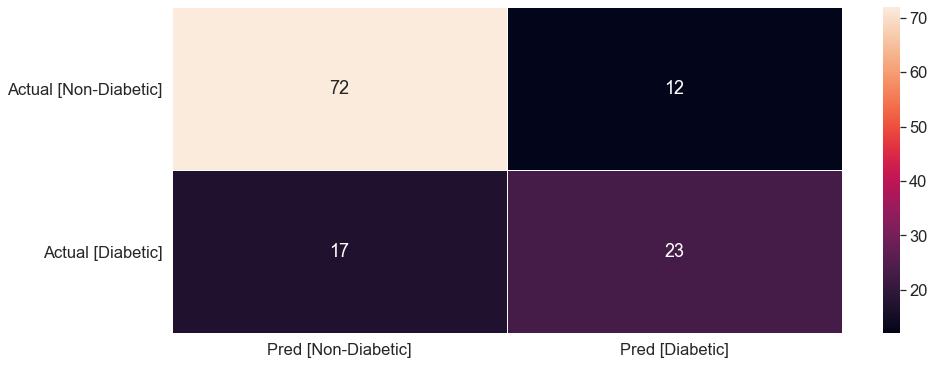

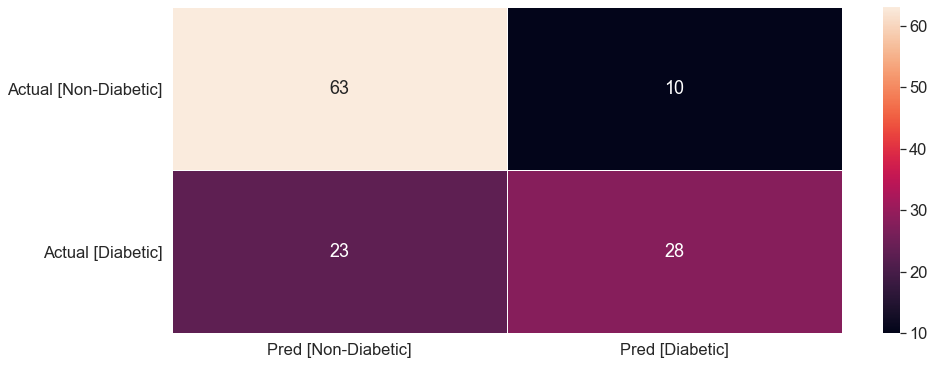

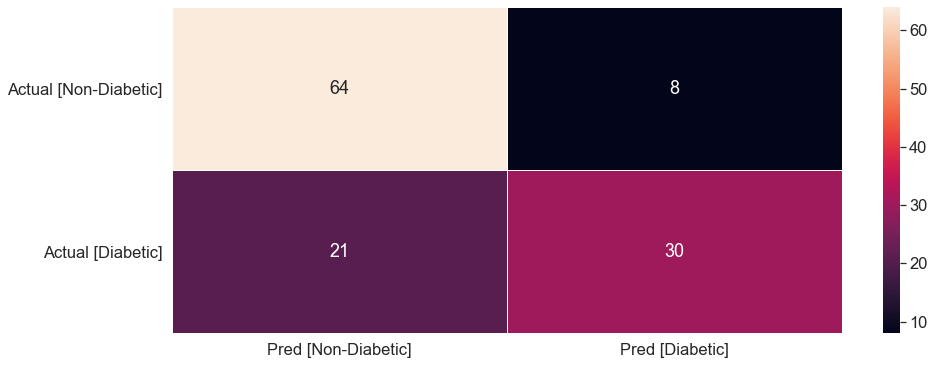

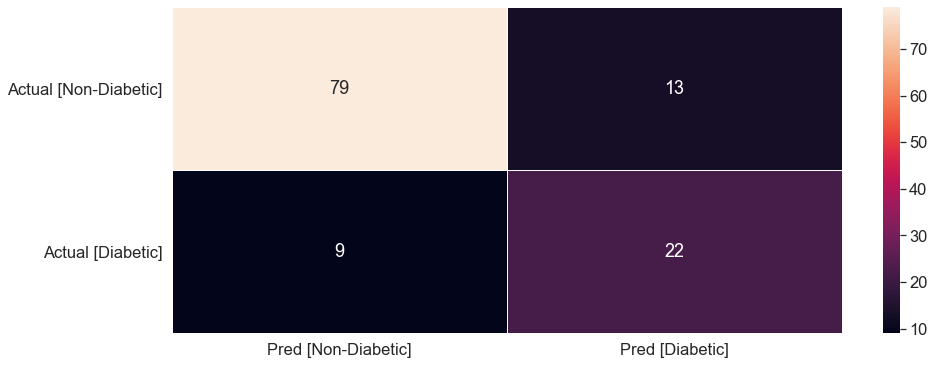

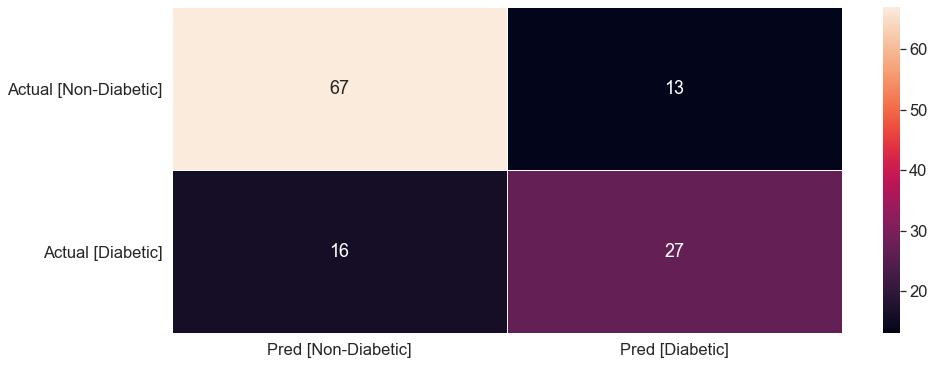

In [228]:
plot_all_conf_matrix(conf_matrix_rac)

## Test

In [229]:
## Test
aucs_test = []
for model in models_rac:
    ##Reemplazo nulos
    test_dataframe = test_data.copy()
    columnsWithNulls = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
    test_dataframe[columnsWithNulls] = test_dataframe[columnsWithNulls].replace(np.NaN,model[0])
    test_dataframe = test_dataframe.drop(removeColsImproved, axis=1)

    true_test_outcomes = []
    pred_test_outcomes = []

    for index, row in test_dataframe.iterrows():
        true_outcome = row["Outcome"]
        pred_outcome = pred(row.to_list()[:-1], model[1], model[2])
        true_test_outcomes.append(true_outcome)
        pred_test_outcomes.append(pred_outcome)

    fpr_test, tpr_test, thresholds_test = metrics.roc_curve(true_test_outcomes, pred_test_outcomes)
    auc_test_i = metrics.auc(fpr_test, tpr_test)
    aucs_test.append(auc_test_i)


In [230]:
print('AUC Test: ' + str(round(np.array(aucs_test).mean(),3)))

AUC Test: 0.693
